In [1]:
import dlib
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load the dlib face detector
detector = dlib.get_frontal_face_detector()

# Load an image
image = plt.imread('HICO_test2015_00000005.jpg')

# Convert the image to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = detector(image)


FileNotFoundError: [Errno 2] No such file or directory: 'HICO_test2015_00000005.jpg'

In [3]:
# Draw rectangles around the detected faces
for face in faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

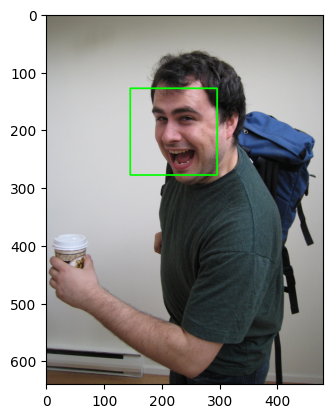

In [4]:
plt.imshow(image)

True

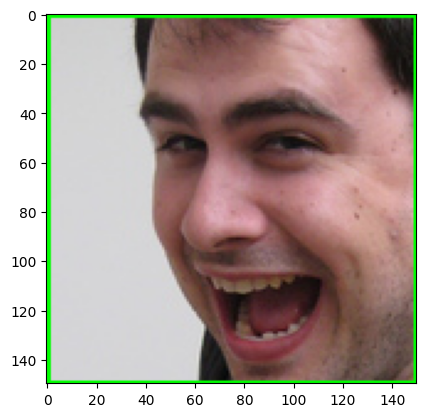

In [5]:
# Crop face
crop_img = image[y:y+h, x:x+w]
plt.imshow(crop_img)

# Save image
cv2.imwrite('face.jpg', crop_img)

In [11]:
import os

# 비디오 읽기
cap = cv2.VideoCapture('007.mp4') # 비디오 이름('007.mp4')

# 저장할 폴더 생성
os.makedirs('face', exist_ok=True)
face_count = 0
frame_count = 0

# 샘플링 레이트
sampling_rate = 10

# 비디오 프레임 읽기
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        frame_count += 1
        # 샘플링 레이트
        if frame_count % sampling_rate == 0:
            # 프레임별 얼굴 검출
            faces = detector(frame)
            # 프레임에 얼굴이 여러개인 경우 for loop 순회
            for face in faces:
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                crop_img = frame[y:y+h, x:x+w]
                if crop_img.is_empty():
                    continue
                cv2.imwrite('face/frame_{}_face_{}.jpg'.format(frame_count, face_count), crop_img)
                face_count += 1



error: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'
